# 基础设置

In [1]:
# 调用所需程序包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn
from numpy.polynomial import Polynomial

In [2]:
# 设置绘图环境
seaborn.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 设置随机数种子
random = np.random.RandomState(2202566)

In [4]:
# 设置被插函数
f = lambda x: np.exp(-x / 2) * (x >= 0) * (x <= 2)

In [5]:
# 设置插值逼近函数
def 插值逼近(n):
    '''输入插值节点个数n
    输出指定点插值的截断误差以及可视化结果
    返回基于课本第二章1~5节计算得到的插值多项式
    
    算法一：待定系数法->n次多项式
    算法二：Lagrange插值法->n次多项式
    算法三：逐次线性插值法->n次多项式
    算法四：Newton插值法->n次多项式
    算法五：Hermite插值法->2n+1次多项式
    
    鉴于算法一与算法四的结果仅存在精度上的细微差异，
    进行n次插值函数的截断误差及可视化处理时将使用算法一得到的插值多项式
    
    多项式的数据类型为numpy.polynomial.polynomial.Polynomial'''
    
    # 设置插值节点
    x = random.uniform(0, 2, n)
    y = f(x)
    y_prime = sp.misc.derivative(f, x, 1e-6)
    
    # 设置截断误差计算节点
    xx = np.linspace(0, 2, 11)
    yy = f(xx)
    
    # 设置用于记录各个算法计算结果的栈
    p = []
    
    # 算法一：利用待定系数法直接计算
    v = np.vander(x)
    p1 = np.linalg.solve(v, y)
    p1 = p1[::-1]
    p1 = Polynomial(p1)
    p.append(p1)
    
    # 算法二：利用Lagrange插值多项式计算
    Lagrange = [Polynomial(1) for I in range(n)]
    for I in range(n): # 处理累加
        for J in range(n): # 处理累乘
            if J is not I:
                Lagrange[I] *= Polynomial([-x[J], 1]) / (x[I] - x[J])
    p2 = sum([y[I] * Lagrange[I] for I in range(n)])
    p.append(p2)
    
    # 算法三：利用逐次线性插值法计算
    Aitken = [Polynomial(y[I]) for I in range(n)]
    for I in range(1, n): # 处理逐次插值
        for J in np.arange(I, n)[::-1]: # 处理节点合并
            k = (Aitken[J] - Aitken[J-1]) / (x[J] - x[J-I])
            Aitken[J] = Aitken[J-1] + k * (Polynomial([0, 1]) - x[J-I])
    p3 = Aitken[-1]
    p.append(p3)
    
    # 算法四：利用Newton插值多项式计算
    Newton = [Polynomial(y[I]) for I in range(n)]
    for I in range(1, n): # 处理逐阶差商
        for J in np.arange(I, n)[::-1]: # 处理节点合并，此处类似算法三
            Newton[J] = (Newton[J] - Newton[J-1]) / (x[J] - x[J-I])
    for I in range(n): # 处理累加
        for J in range(I): # 处理累乘，此处类似算法二
            Newton[I] *= Polynomial([-x[J], 1])
    p4 = sum(Newton)
    p.append(p4)
    
    # 算法五：利用Hermite插值多项式计算
    Hermite = [(1 - 2*Polynomial([-x[I], 1])*Lagrange[I].deriv()(x[I])) *\
               Lagrange[I]**2 for I in range(n)] # 利用算法二得到的Lagrange列表
    Hermite_prime = [Polynomial([-x[I], 1]) * \
                     Lagrange[I]**2 for I in range(n)]
    p5 = sum([y[I] * Hermite[I] +\
              y_prime[I] * Hermite_prime[I] for I in range(n)])
    p.append(p5)
    
    # 计算截断误差
    df = {'自变量':xx, '被插函数值':yy,\
          'n次插值函数值':p1(xx), 'n次截断误差':yy - p1(xx),\
          'Hermite插值函数值':p5(xx), 'Hermite截断误差':yy - p5(xx)}
    df = pd.DataFrame(df)
    display(df)
    
    # 绘制可视化结果
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.plot(x, y, 'r*', label='插值节点')
    ax.plot(xx, p1(xx), 'b', label=r'$n$次插值多项式$P_n$')
    ax.plot(xx, p5(xx), 'g', label=r'Hermite插值多项式$H_{2n+1}$')
    ax.legend();
    return p

# 第一题

,自变量,被插函数值,n次插值函数值,n次截断误差,Hermite插值函数值,Hermite截断误差
0,0.0,1.000000,0.995792,0.004208,0.999999,1.285281e-06
1,0.2,0.904837,0.908384,-0.003547,0.904836,9.495996e-07
2,0.4,0.818731,0.826459,-0.007728,0.818726,4.685281e-06
3,0.6,0.740818,0.750017,-0.009199,0.740811,6.893240e-06
4,0.8,0.670320,0.679057,-0.008737,0.670314,6.454732e-06
5,1.0,0.606531,0.613580,-0.007050,0.606526,4.358867e-06
6,1.2,0.548812,0.553586,-0.004775,0.548810,2.072812e-06
7,1.4,0.496585,0.499075,-0.002490,0.496585,5.839783e-07
8,1.6,0.449329,0.450047,-0.000718,0.449329,5.026297e-08
9,1.8,0.406570,0.406501,0.000069,0.406570,4.756614e-10


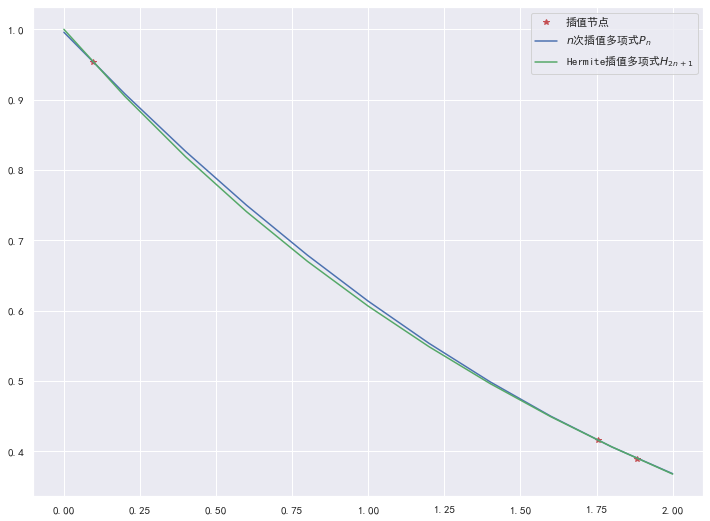

In [6]:
# 运行第一题结果
第一题 = 插值逼近(3)

In [7]:
# 算法一（待定系数法）所得插值多项式
display(第一题[0])

Polynomial([ 0.99579216, -0.4507465 ,  0.06853478], domain=[-1,  1], window=[-1,  1])

In [8]:
# 算法二（Lagrange插值法）所得插值多项式
display(第一题[1])

Polynomial([ 0.99579216, -0.4507465 ,  0.06853478], domain=[-1.,  1.], window=[-1.,  1.])

In [9]:
# 算法三（逐次线性插值法）所得插值多项式
display(第一题[2])

Polynomial([ 0.99579216, -0.4507465 ,  0.06853478], domain=[-1.,  1.], window=[-1.,  1.])

In [10]:
# 算法四（Newton插值法）所得插值多项式
display(第一题[3])

Polynomial([ 0.99579216, -0.4507465 ,  0.06853478], domain=[-1.,  1.], window=[-1.,  1.])

In [11]:
# 算法五（Hermite插值法）所得插值多项式
display(第一题[4])

Polynomial([ 9.99998715e-01, -4.99970165e-01,  1.24795325e-01, -2.04580188e-02,
        2.30189677e-03, -1.41452349e-04], domain=[-1.,  1.], window=[-1.,  1.])

# 第二题

,自变量,被插函数值,n次插值函数值,n次截断误差,Hermite插值函数值,Hermite截断误差
0,0.0,1.000000,0.996333,3.666672e-03,0.999998,2.142071e-06
1,0.2,0.904837,0.903370,1.467616e-03,0.904837,3.988962e-07
2,0.4,0.818731,0.818431,2.996254e-04,0.818731,1.978452e-08
3,0.6,0.740818,0.741017,-1.992389e-04,0.740818,1.086958e-08
4,0.8,0.670320,0.670629,-3.089062e-04,0.670320,3.253116e-08
5,1.0,0.606531,0.606766,-2.351004e-04,0.606531,2.595761e-08
6,1.2,0.548812,0.548928,-1.164017e-04,0.548812,1.188609e-08
7,1.4,0.496585,0.496616,-3.063599e-05,0.496585,6.961431e-09
8,1.6,0.449329,0.449330,-6.564945e-07,0.449329,9.879277e-09
9,1.8,0.406570,0.406569,4.249323e-07,0.406570,1.556515e-08


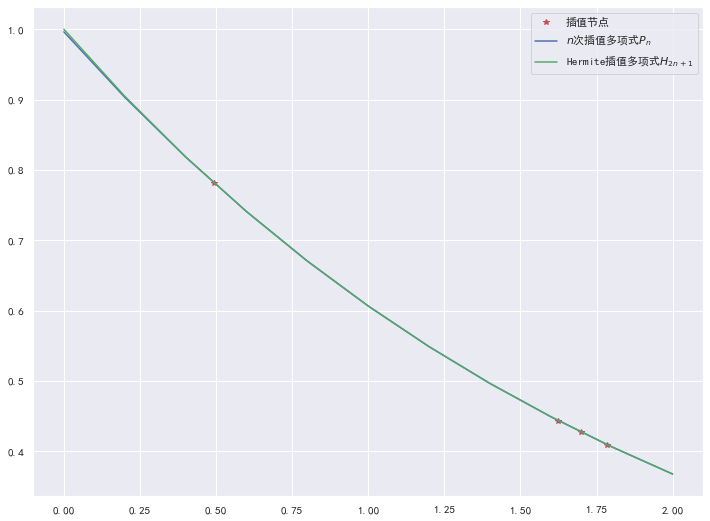

In [12]:
# 运行第二题结果
第二题 = 插值逼近(4)

In [13]:
# 算法一（待定系数法）所得插值多项式
display(第二题[0])

Polynomial([ 0.99633333, -0.48571283,  0.10655871, -0.01041345], domain=[-1,  1], window=[-1,  1])

In [14]:
# 算法二（Lagrange插值法）所得插值多项式
display(第二题[1])

Polynomial([ 0.99633333, -0.48571283,  0.10655871, -0.01041345], domain=[-1.,  1.], window=[-1.,  1.])

In [15]:
# 算法三（逐次线性插值法）所得插值多项式
display(第二题[2])

Polynomial([ 0.99633333, -0.48571283,  0.10655871, -0.01041345], domain=[-1.,  1.], window=[-1.,  1.])

In [16]:
# 算法四（Newton插值法）所得插值多项式
display(第二题[3])

Polynomial([ 0.99633333, -0.48571283,  0.10655871, -0.01041345], domain=[-1.,  1.], window=[-1.,  1.])

In [17]:
# 算法五（Hermite插值法）所得插值多项式
display(第二题[4])

Polynomial([ 9.99997858e-01, -4.99984839e-01,  1.24956964e-01, -2.07693418e-02,
        2.54921382e-03, -2.32400838e-04,  1.34296715e-05, -2.49798177e-07], domain=[-1.,  1.], window=[-1.,  1.])